In [1]:
# 연습문제 5.2.4

In [11]:
from functools import partial
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)
def ieq_constraint2(x, k):
    return np.atleast_1d(k - np.sum(np.abs(x)))
def plot_opt(k):
    x1 = np.linspace(-2, 5, 100)
    x2 = np.linspace(-1.5, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f2plt(X1, X2)
    
    plt.contour(X1, X2, Y, colors="gray",
        levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))
    
    ax = plt.gca()
    x12 = np.linspace(-k, 0, 10)
    x13 = np.linspace(0, k, 10)
    ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
    ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)
    
    # 최적점 위치
    x_sol = sp.optimize.fmin_slsqp(f2, np.array([0, 0]),
                            ieqcons=[partial(ieq_constraint2,
                                             k=k)], iprint=0)
    plt.plot(x_sol[0], x_sol[1], 'ro', ms=20)
    
    plt.xlim(-2, 5)
    plt.ylim(-1.5, 3)
    plt.xticks(np.linspace(-2, 5, 8))
    plt.yticks(np.linspace(-1, 3, 5))
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제"
              .format(k))
    plt.show()

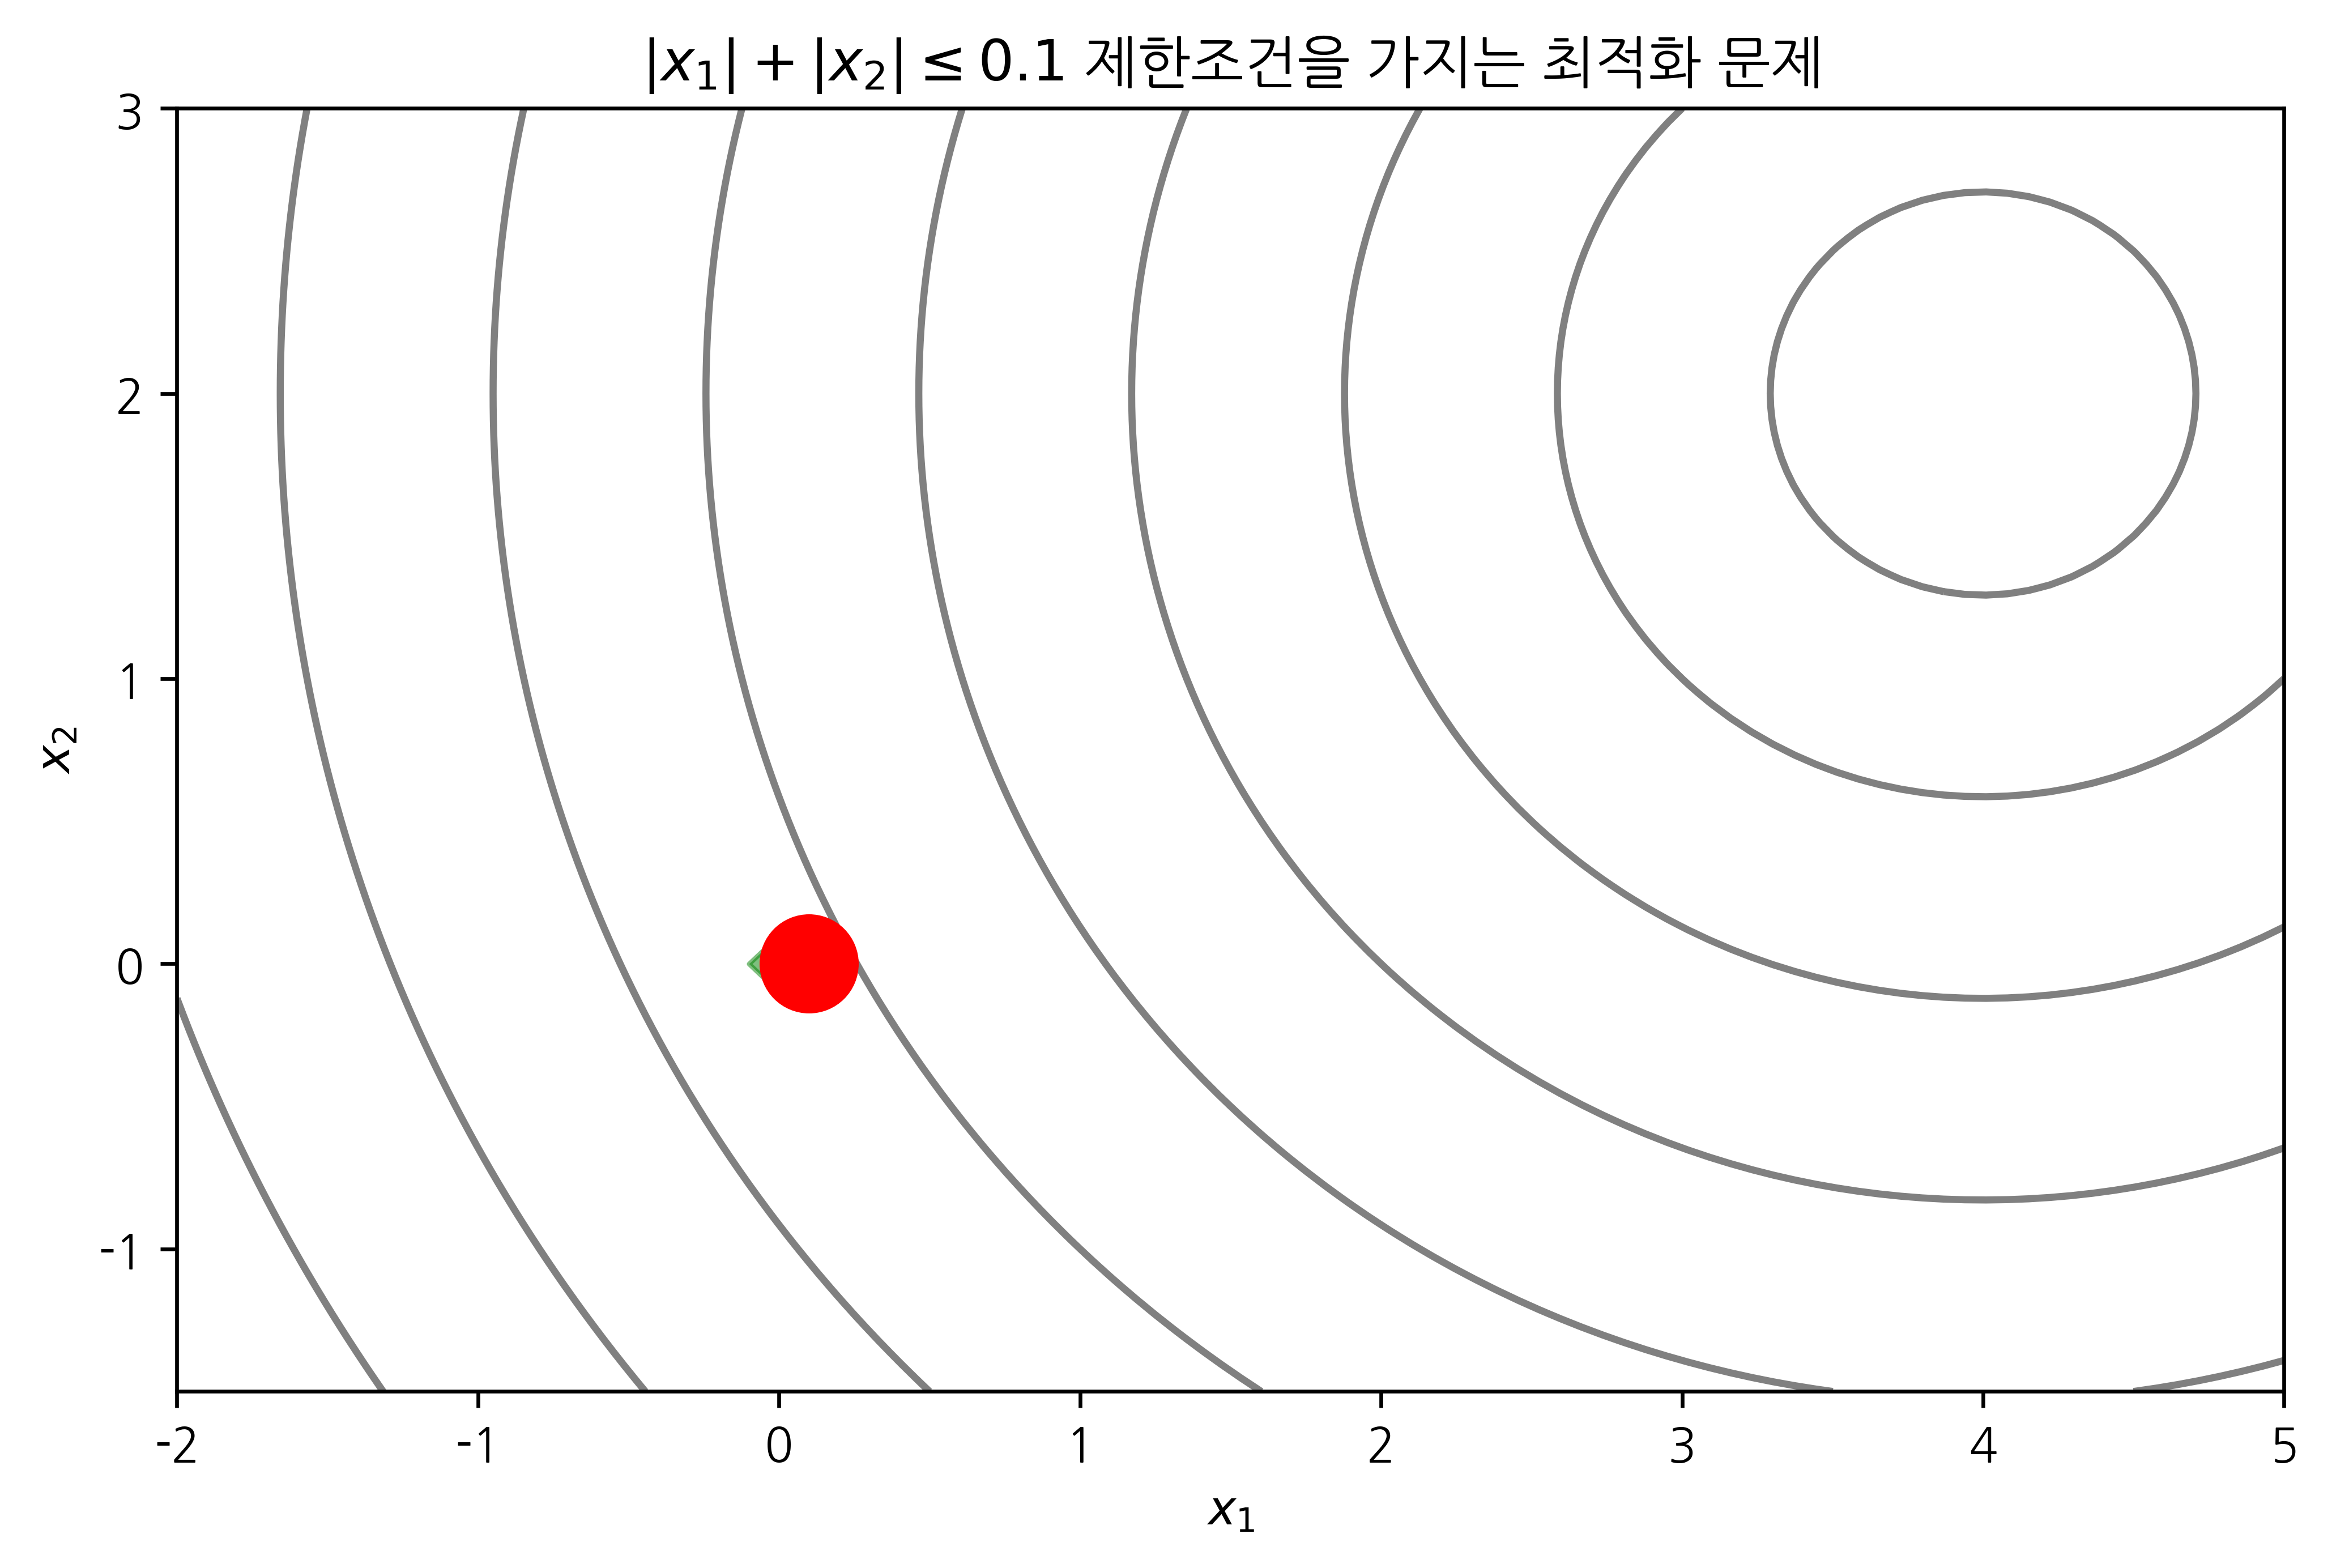

In [13]:
plot_opt(0.1)

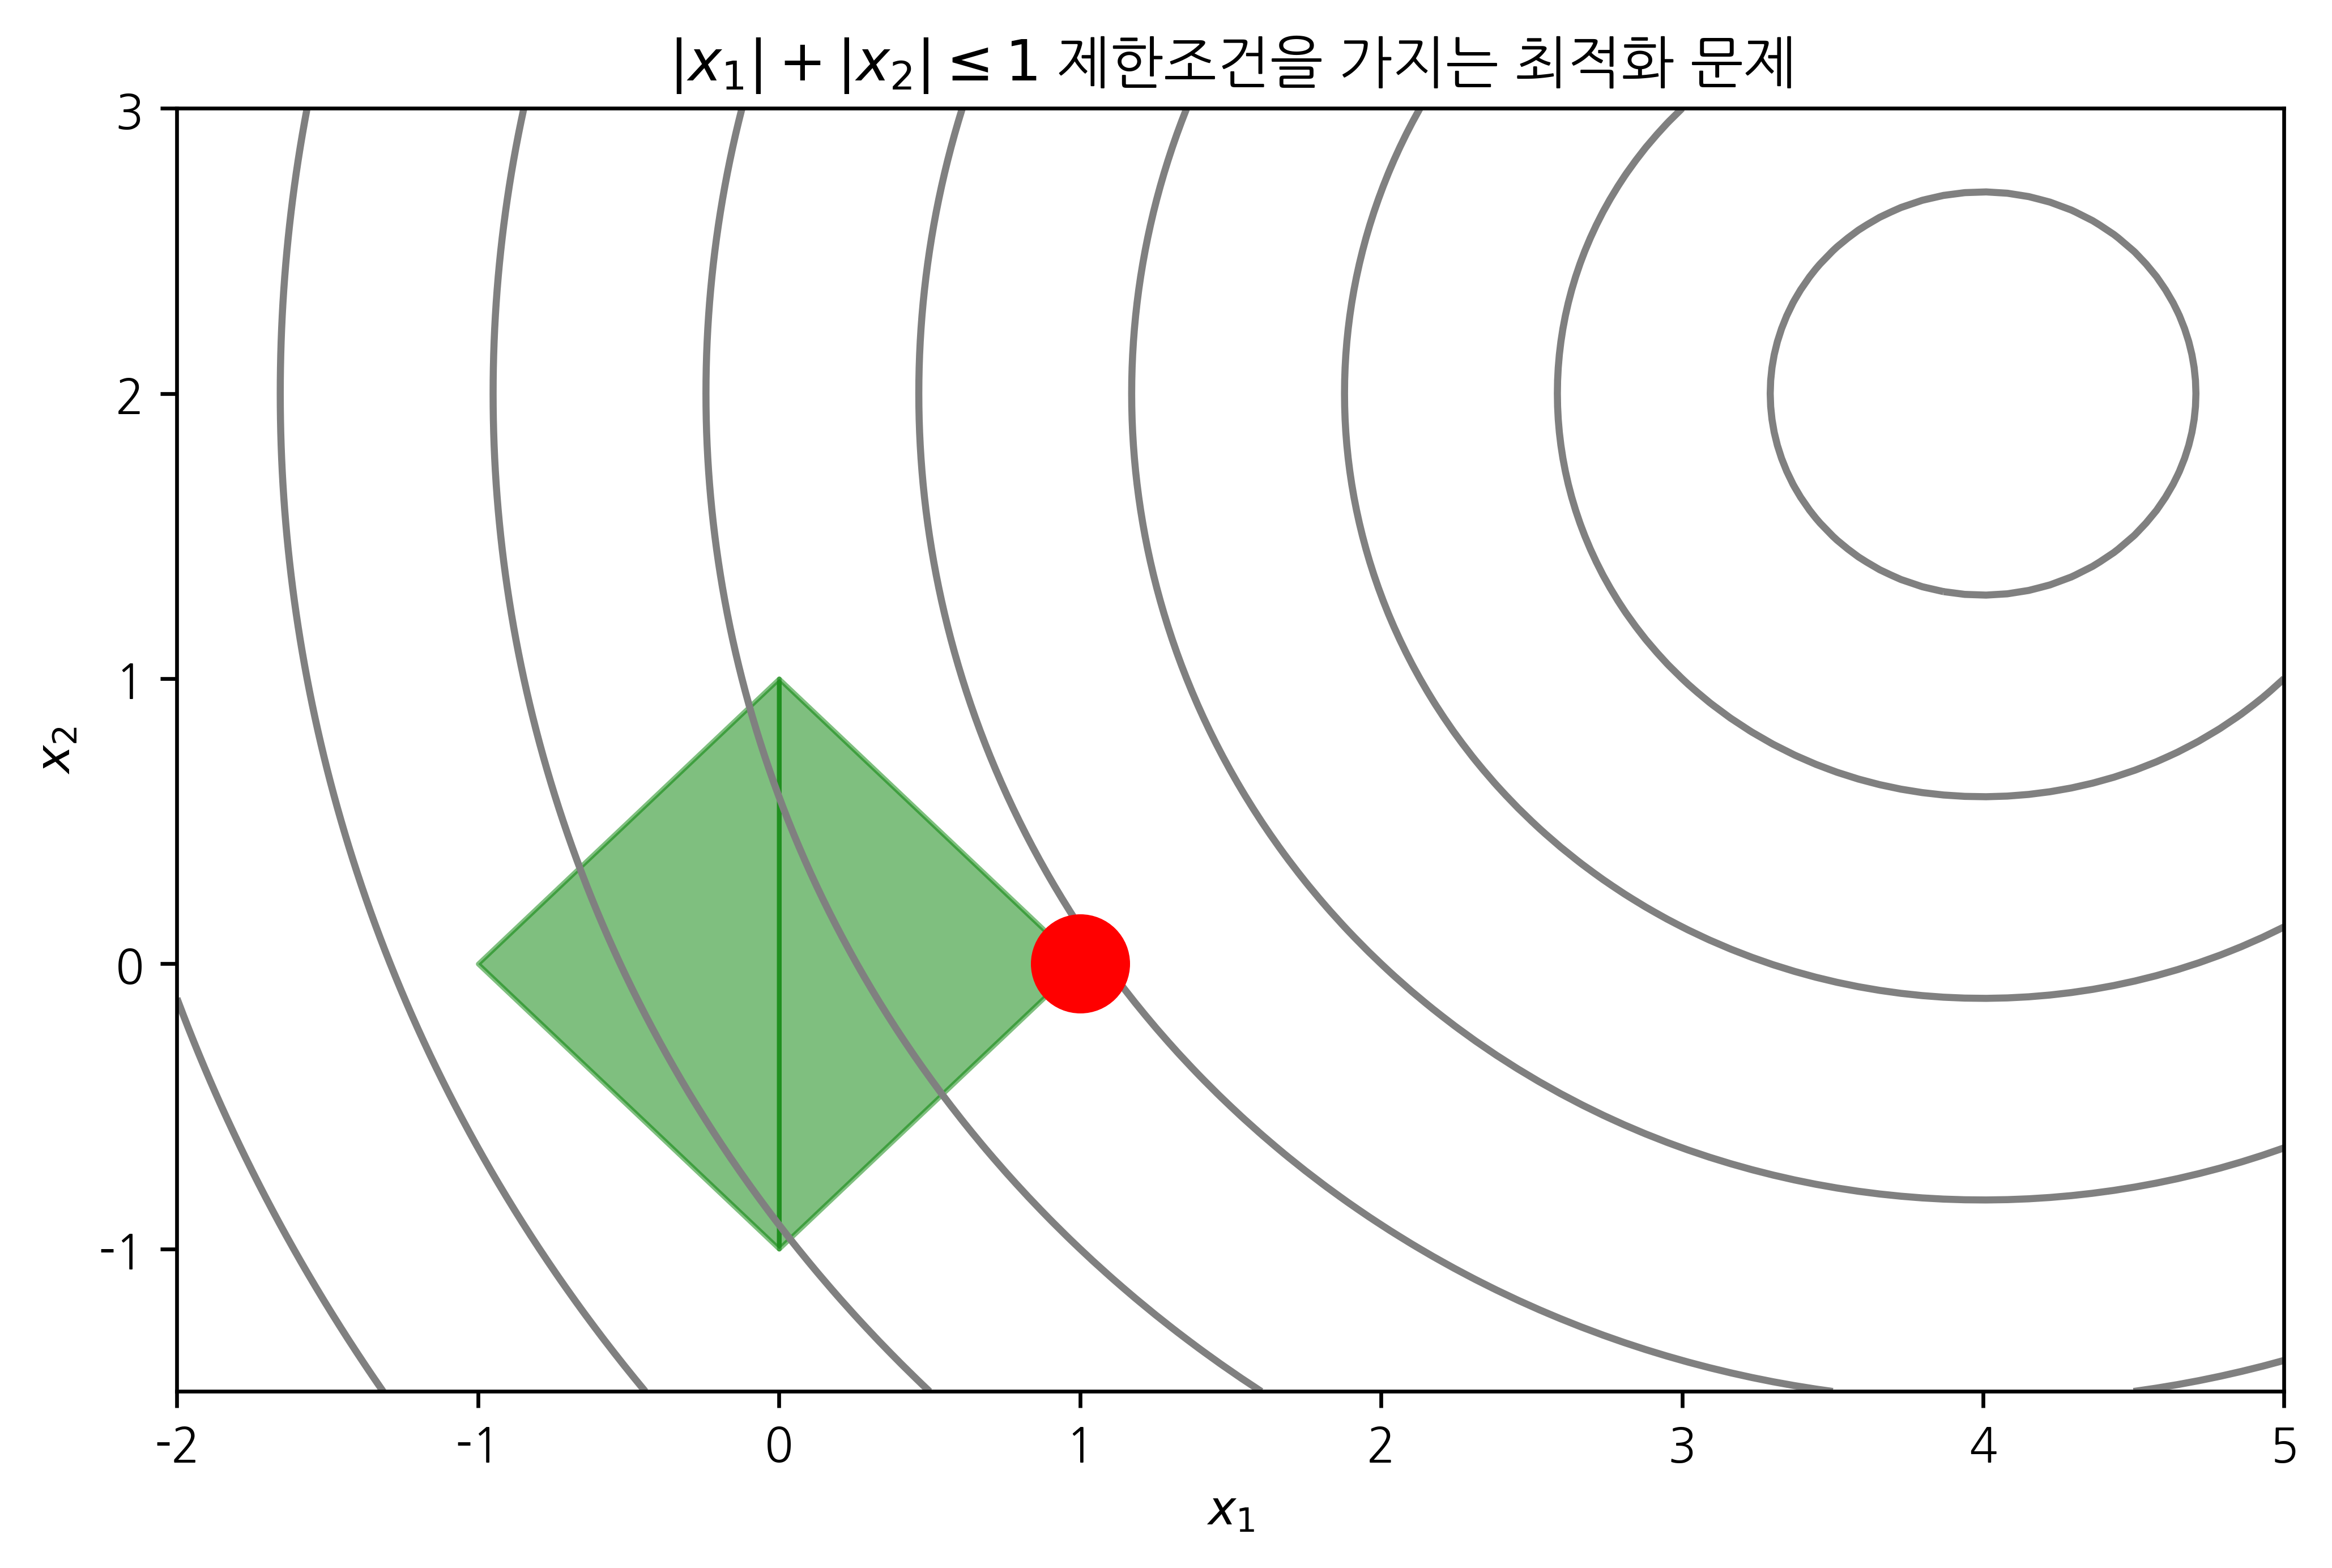

In [14]:
plot_opt(1)

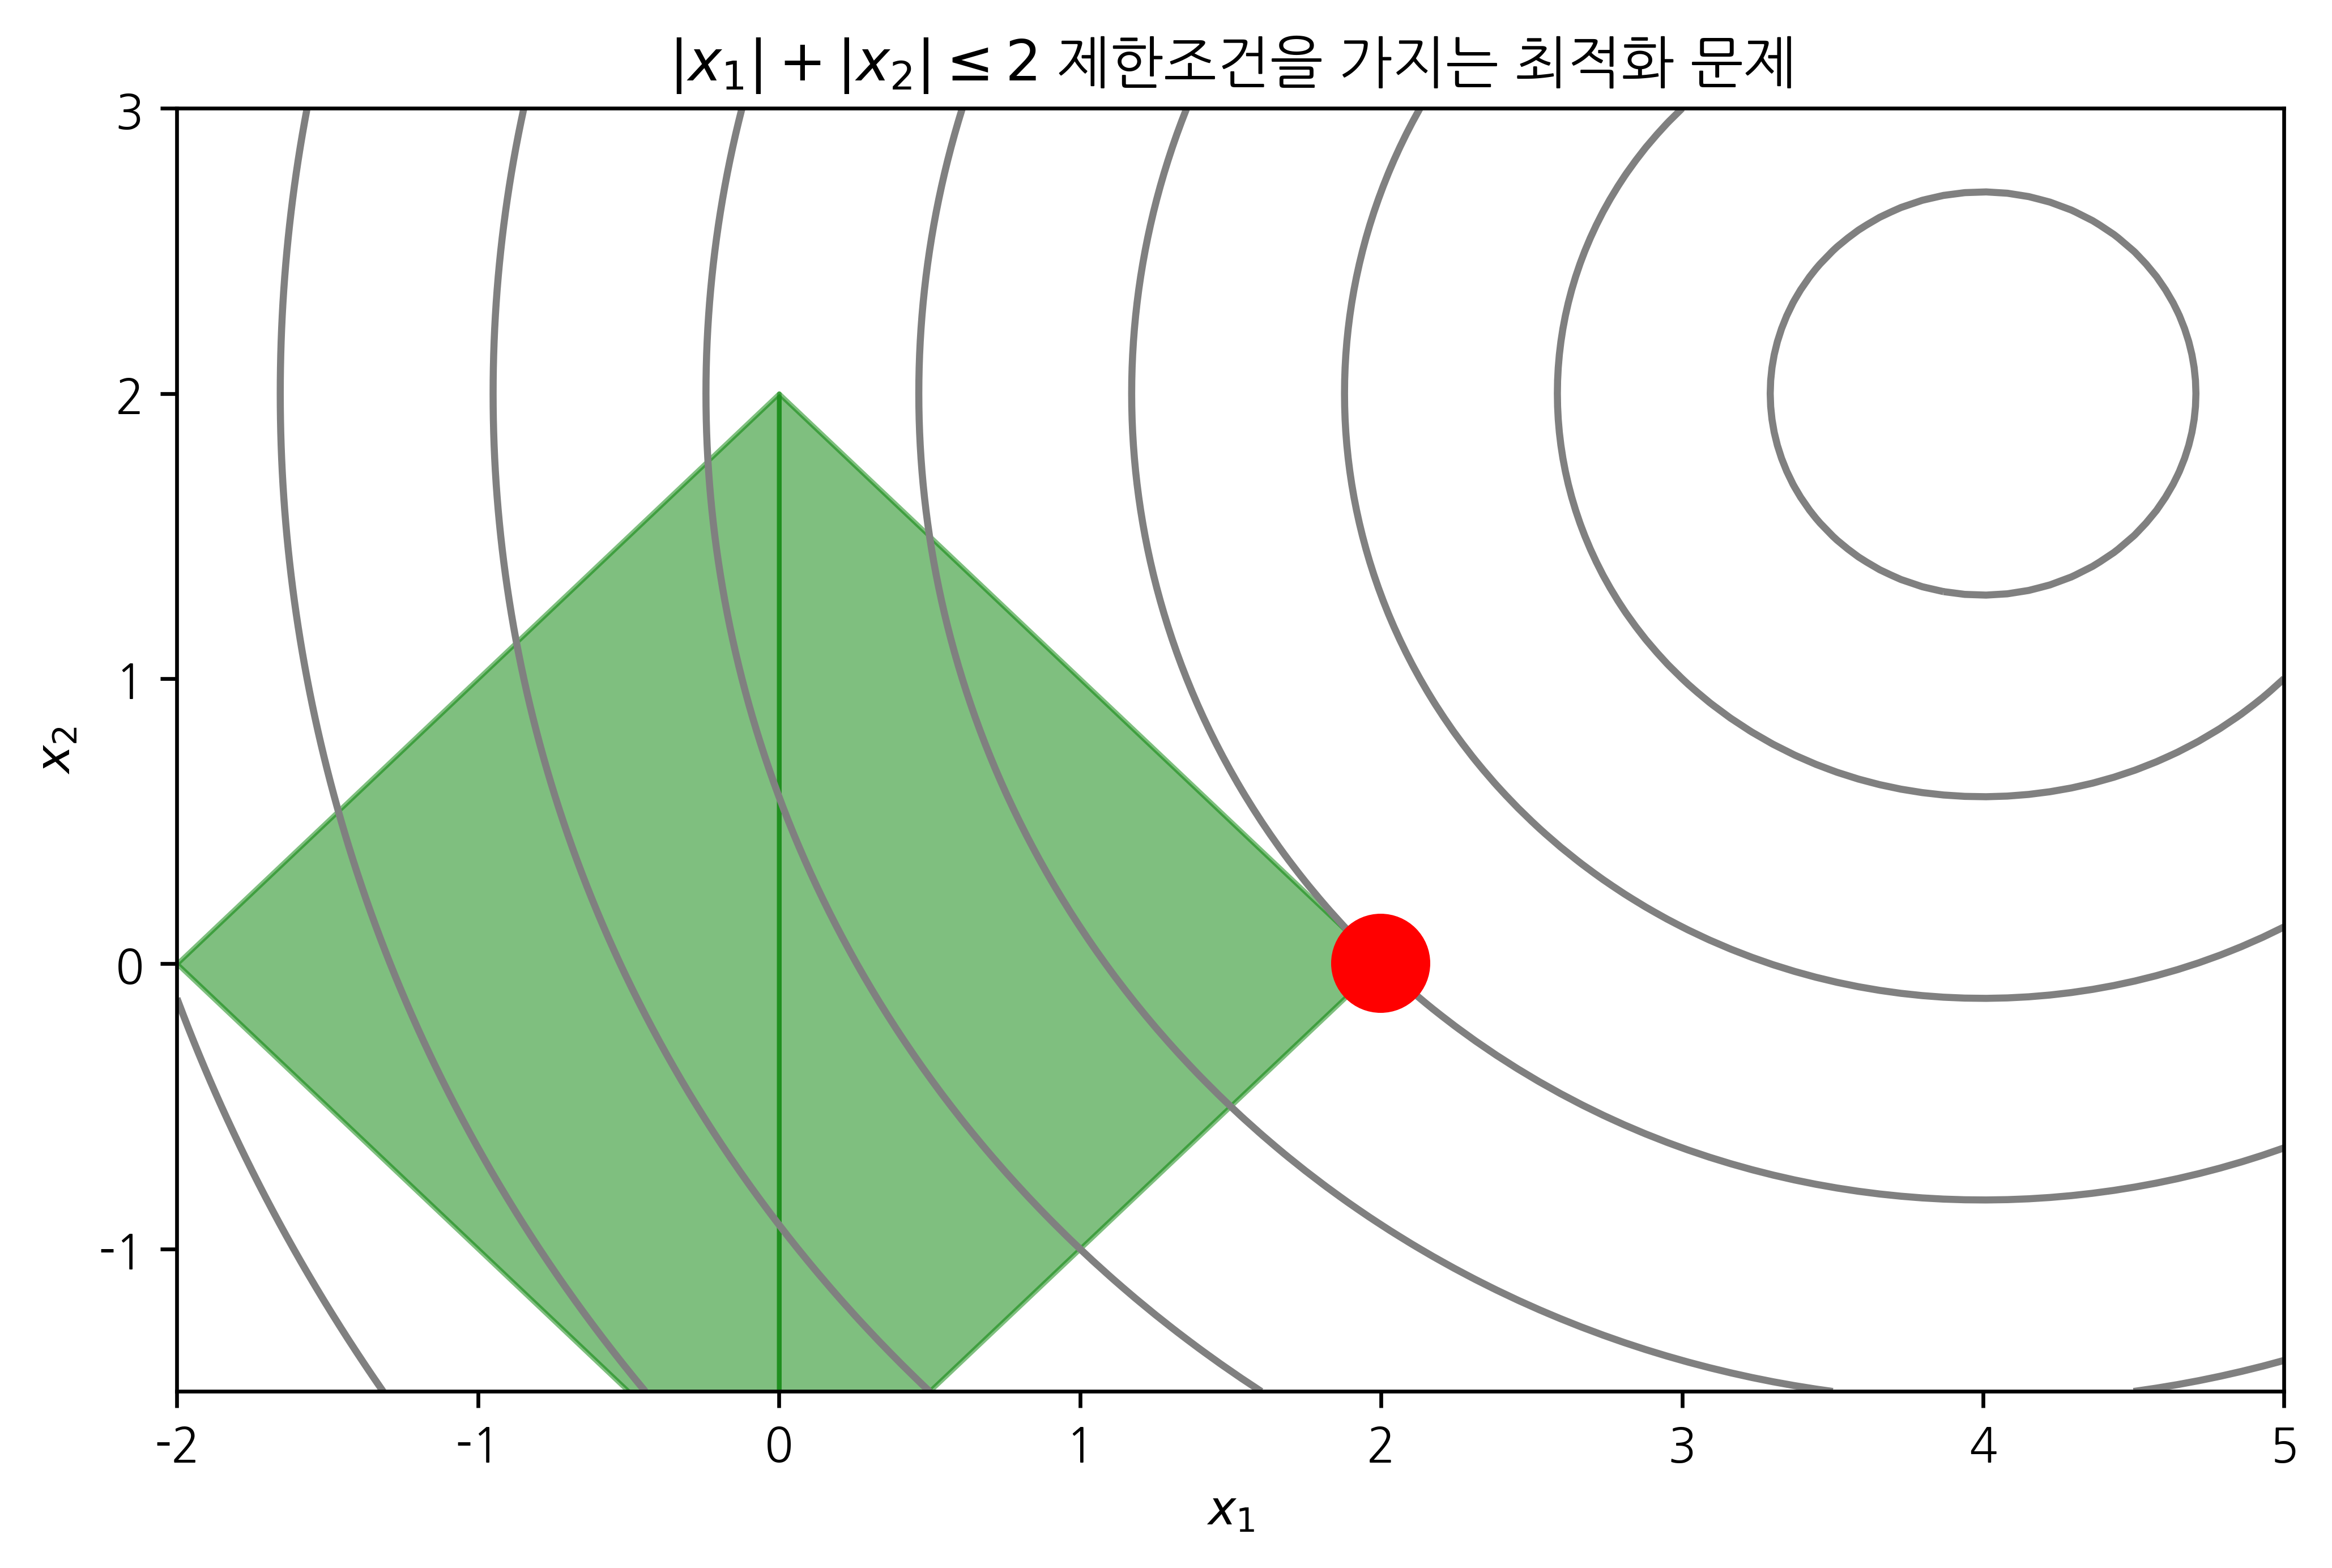

In [15]:
plot_opt(2)

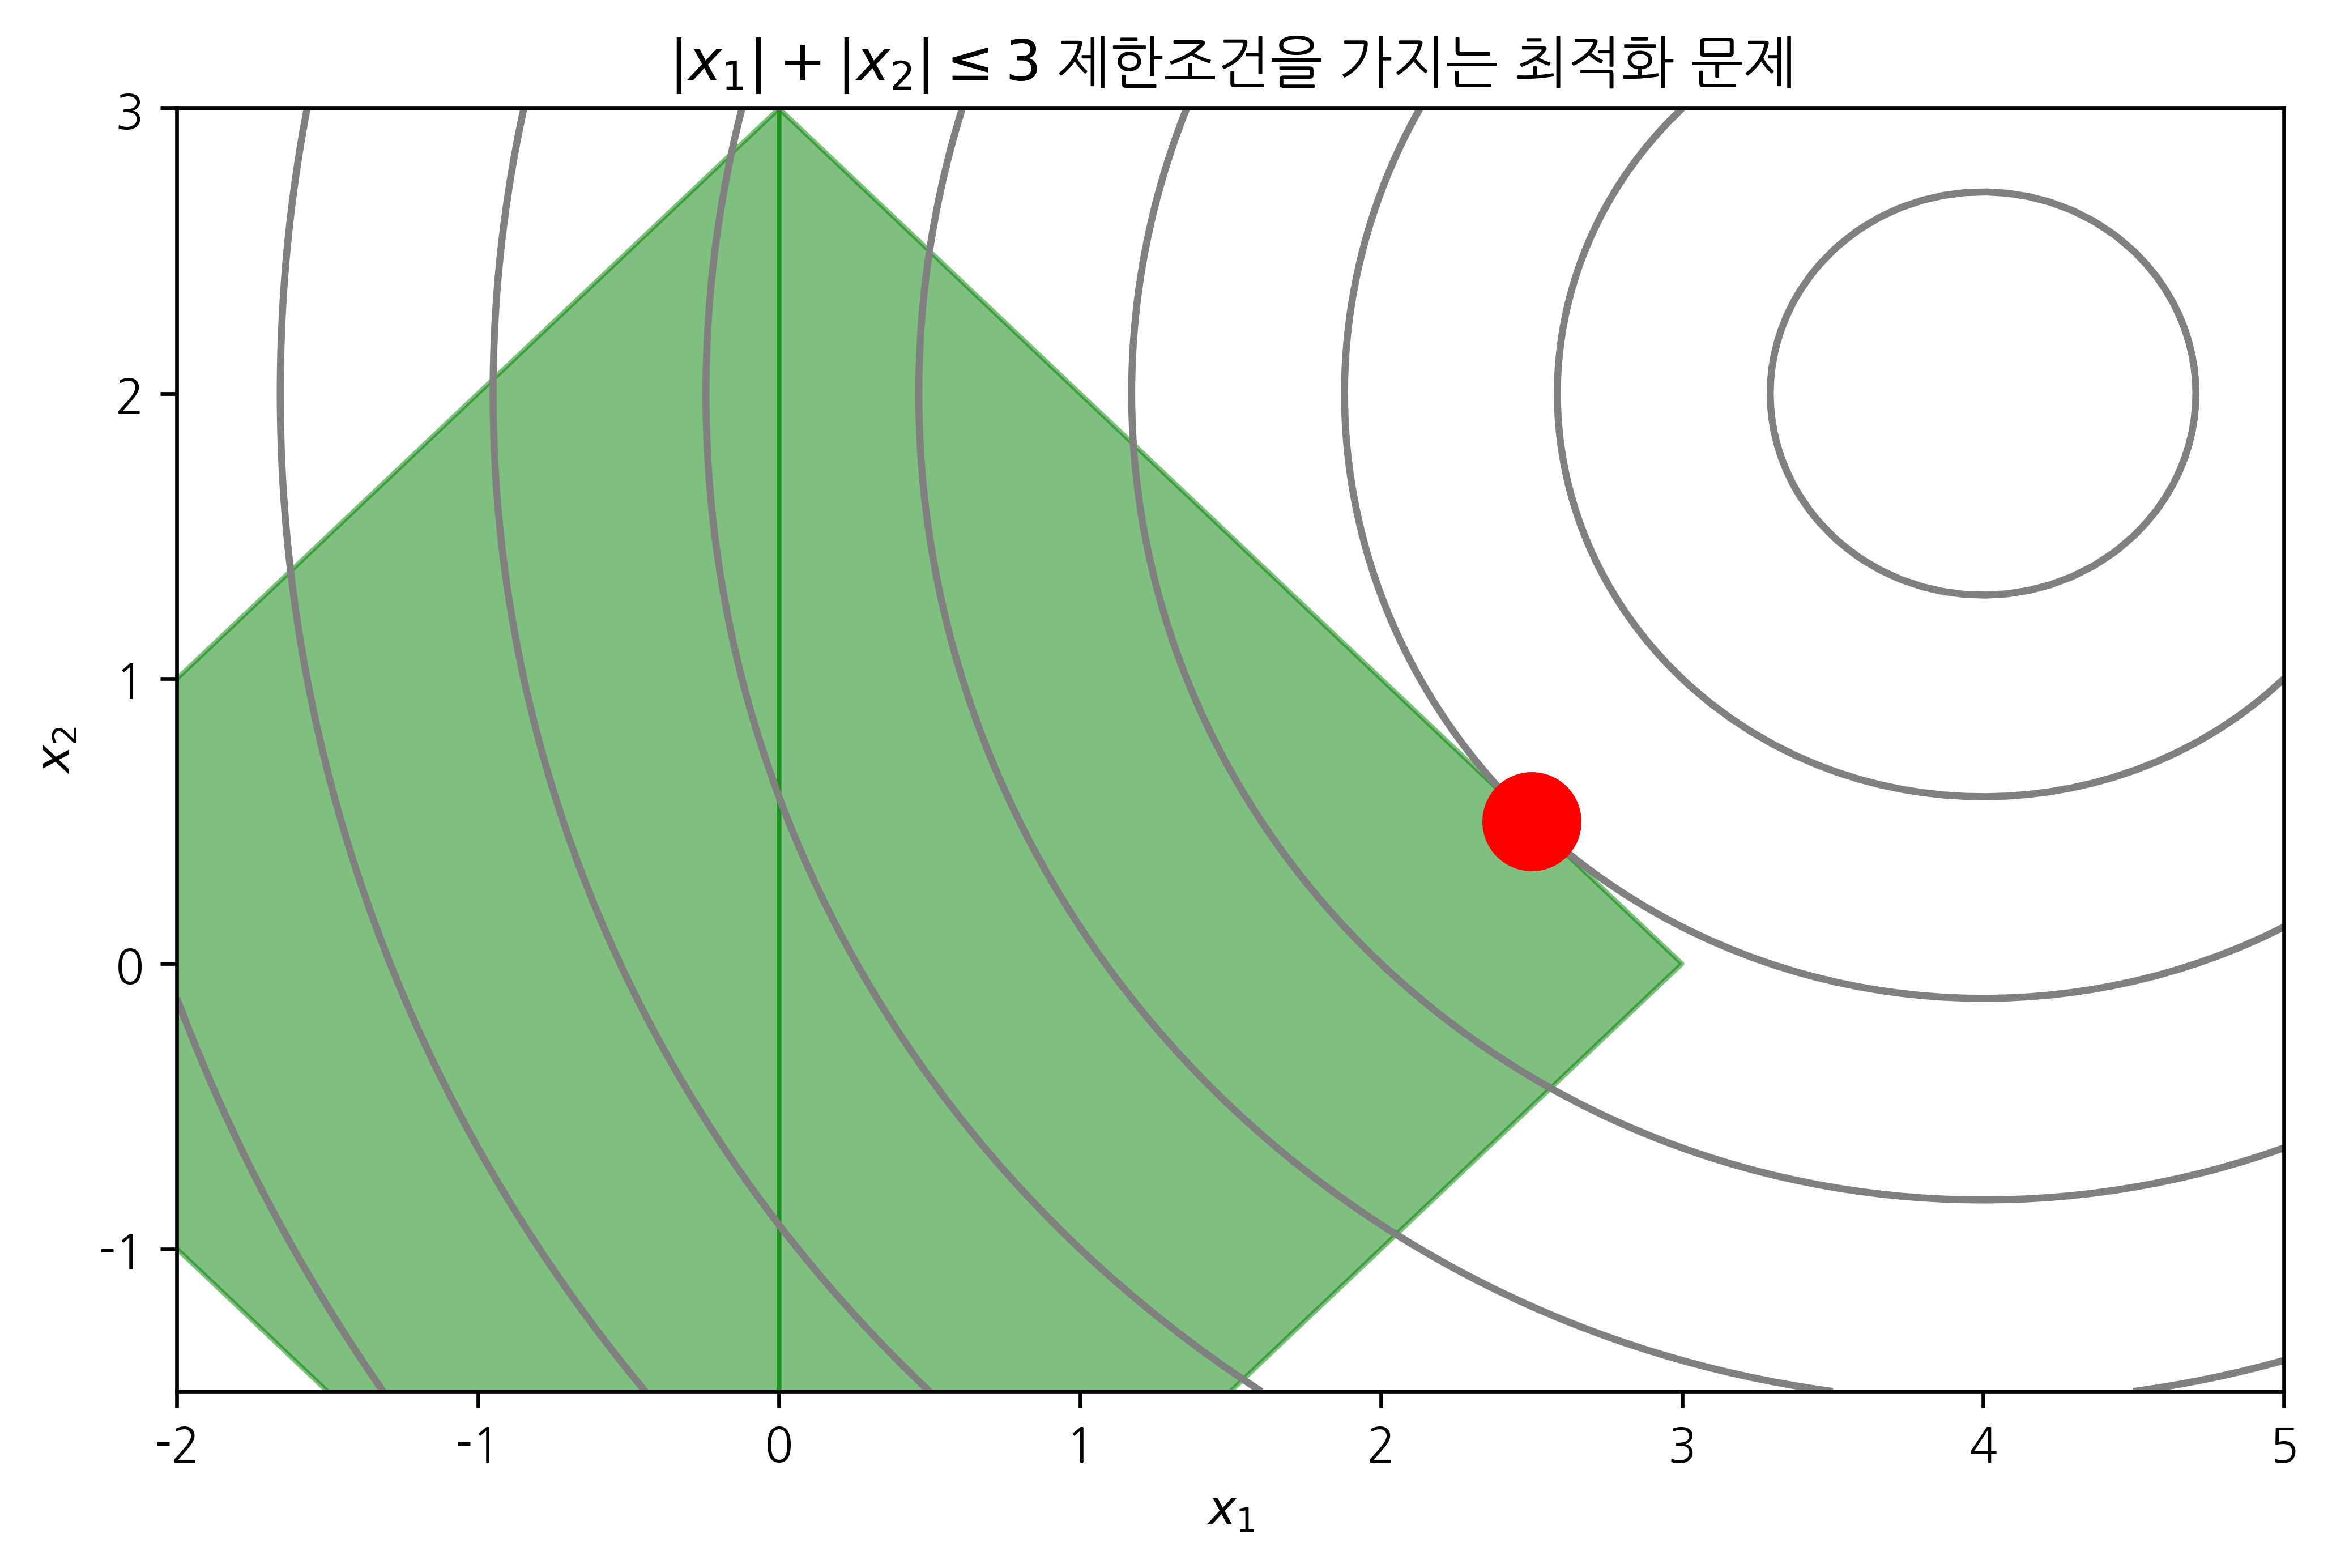

In [16]:
plot_opt(3)

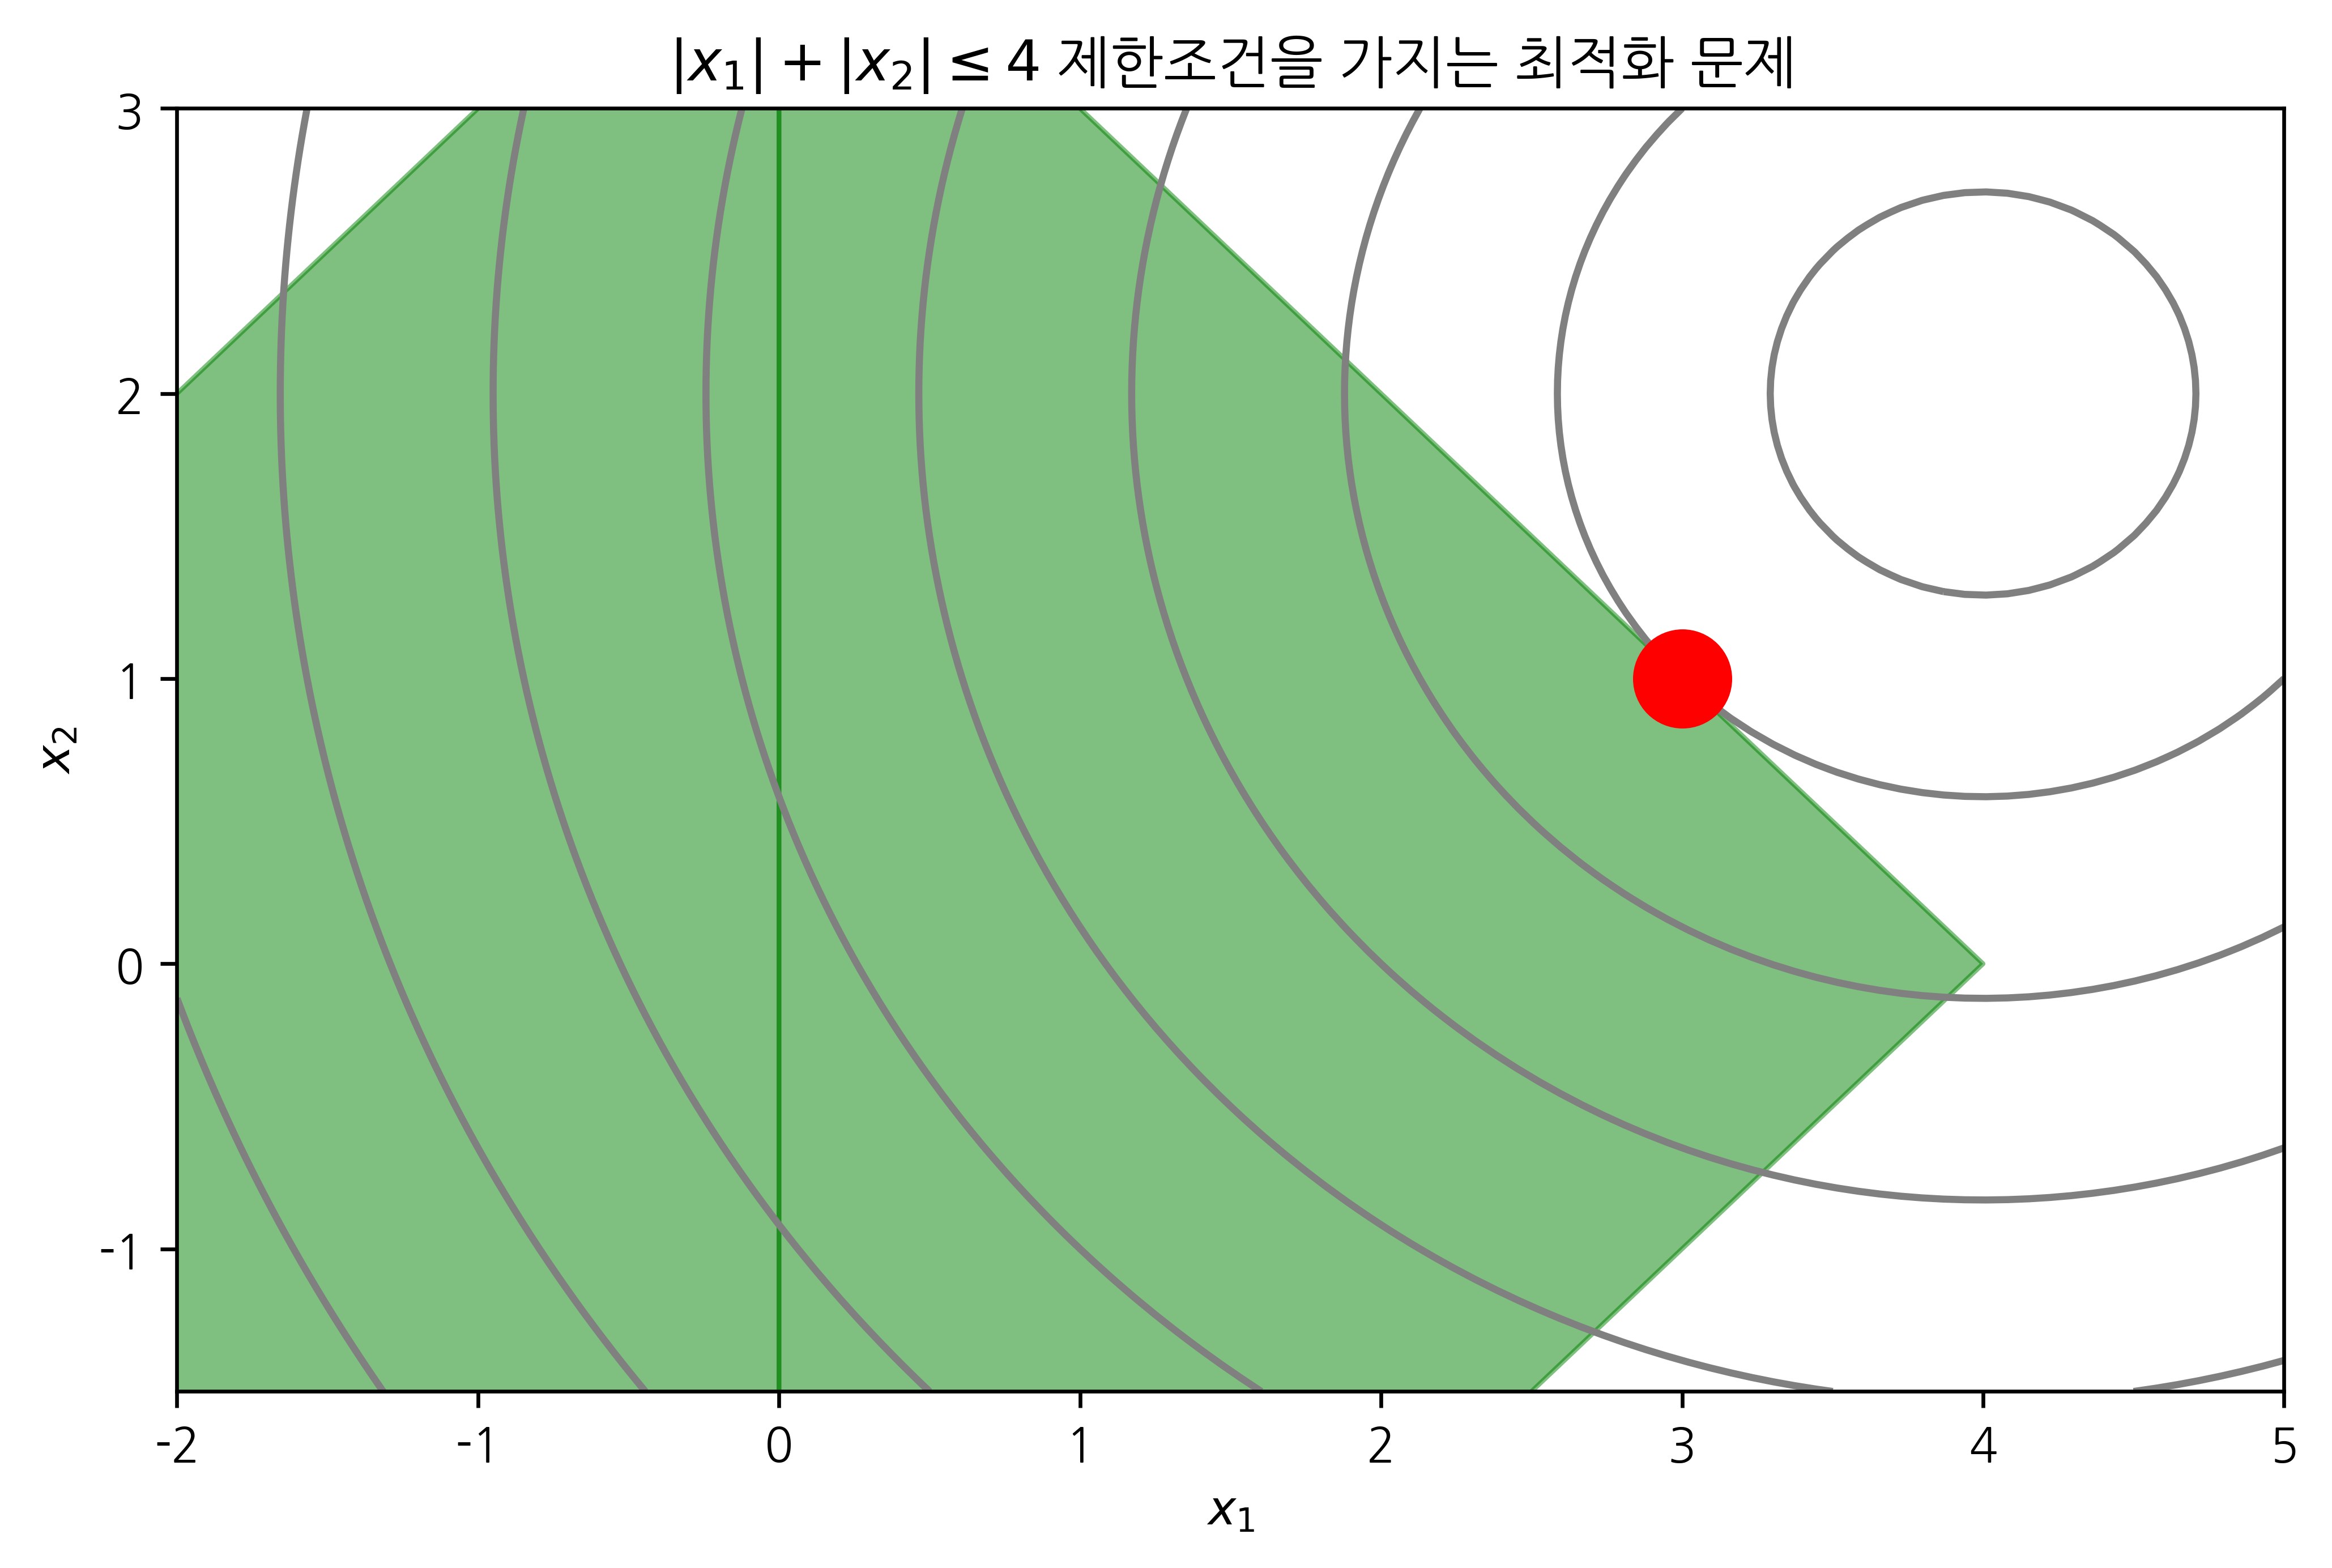

In [17]:
plot_opt(4)

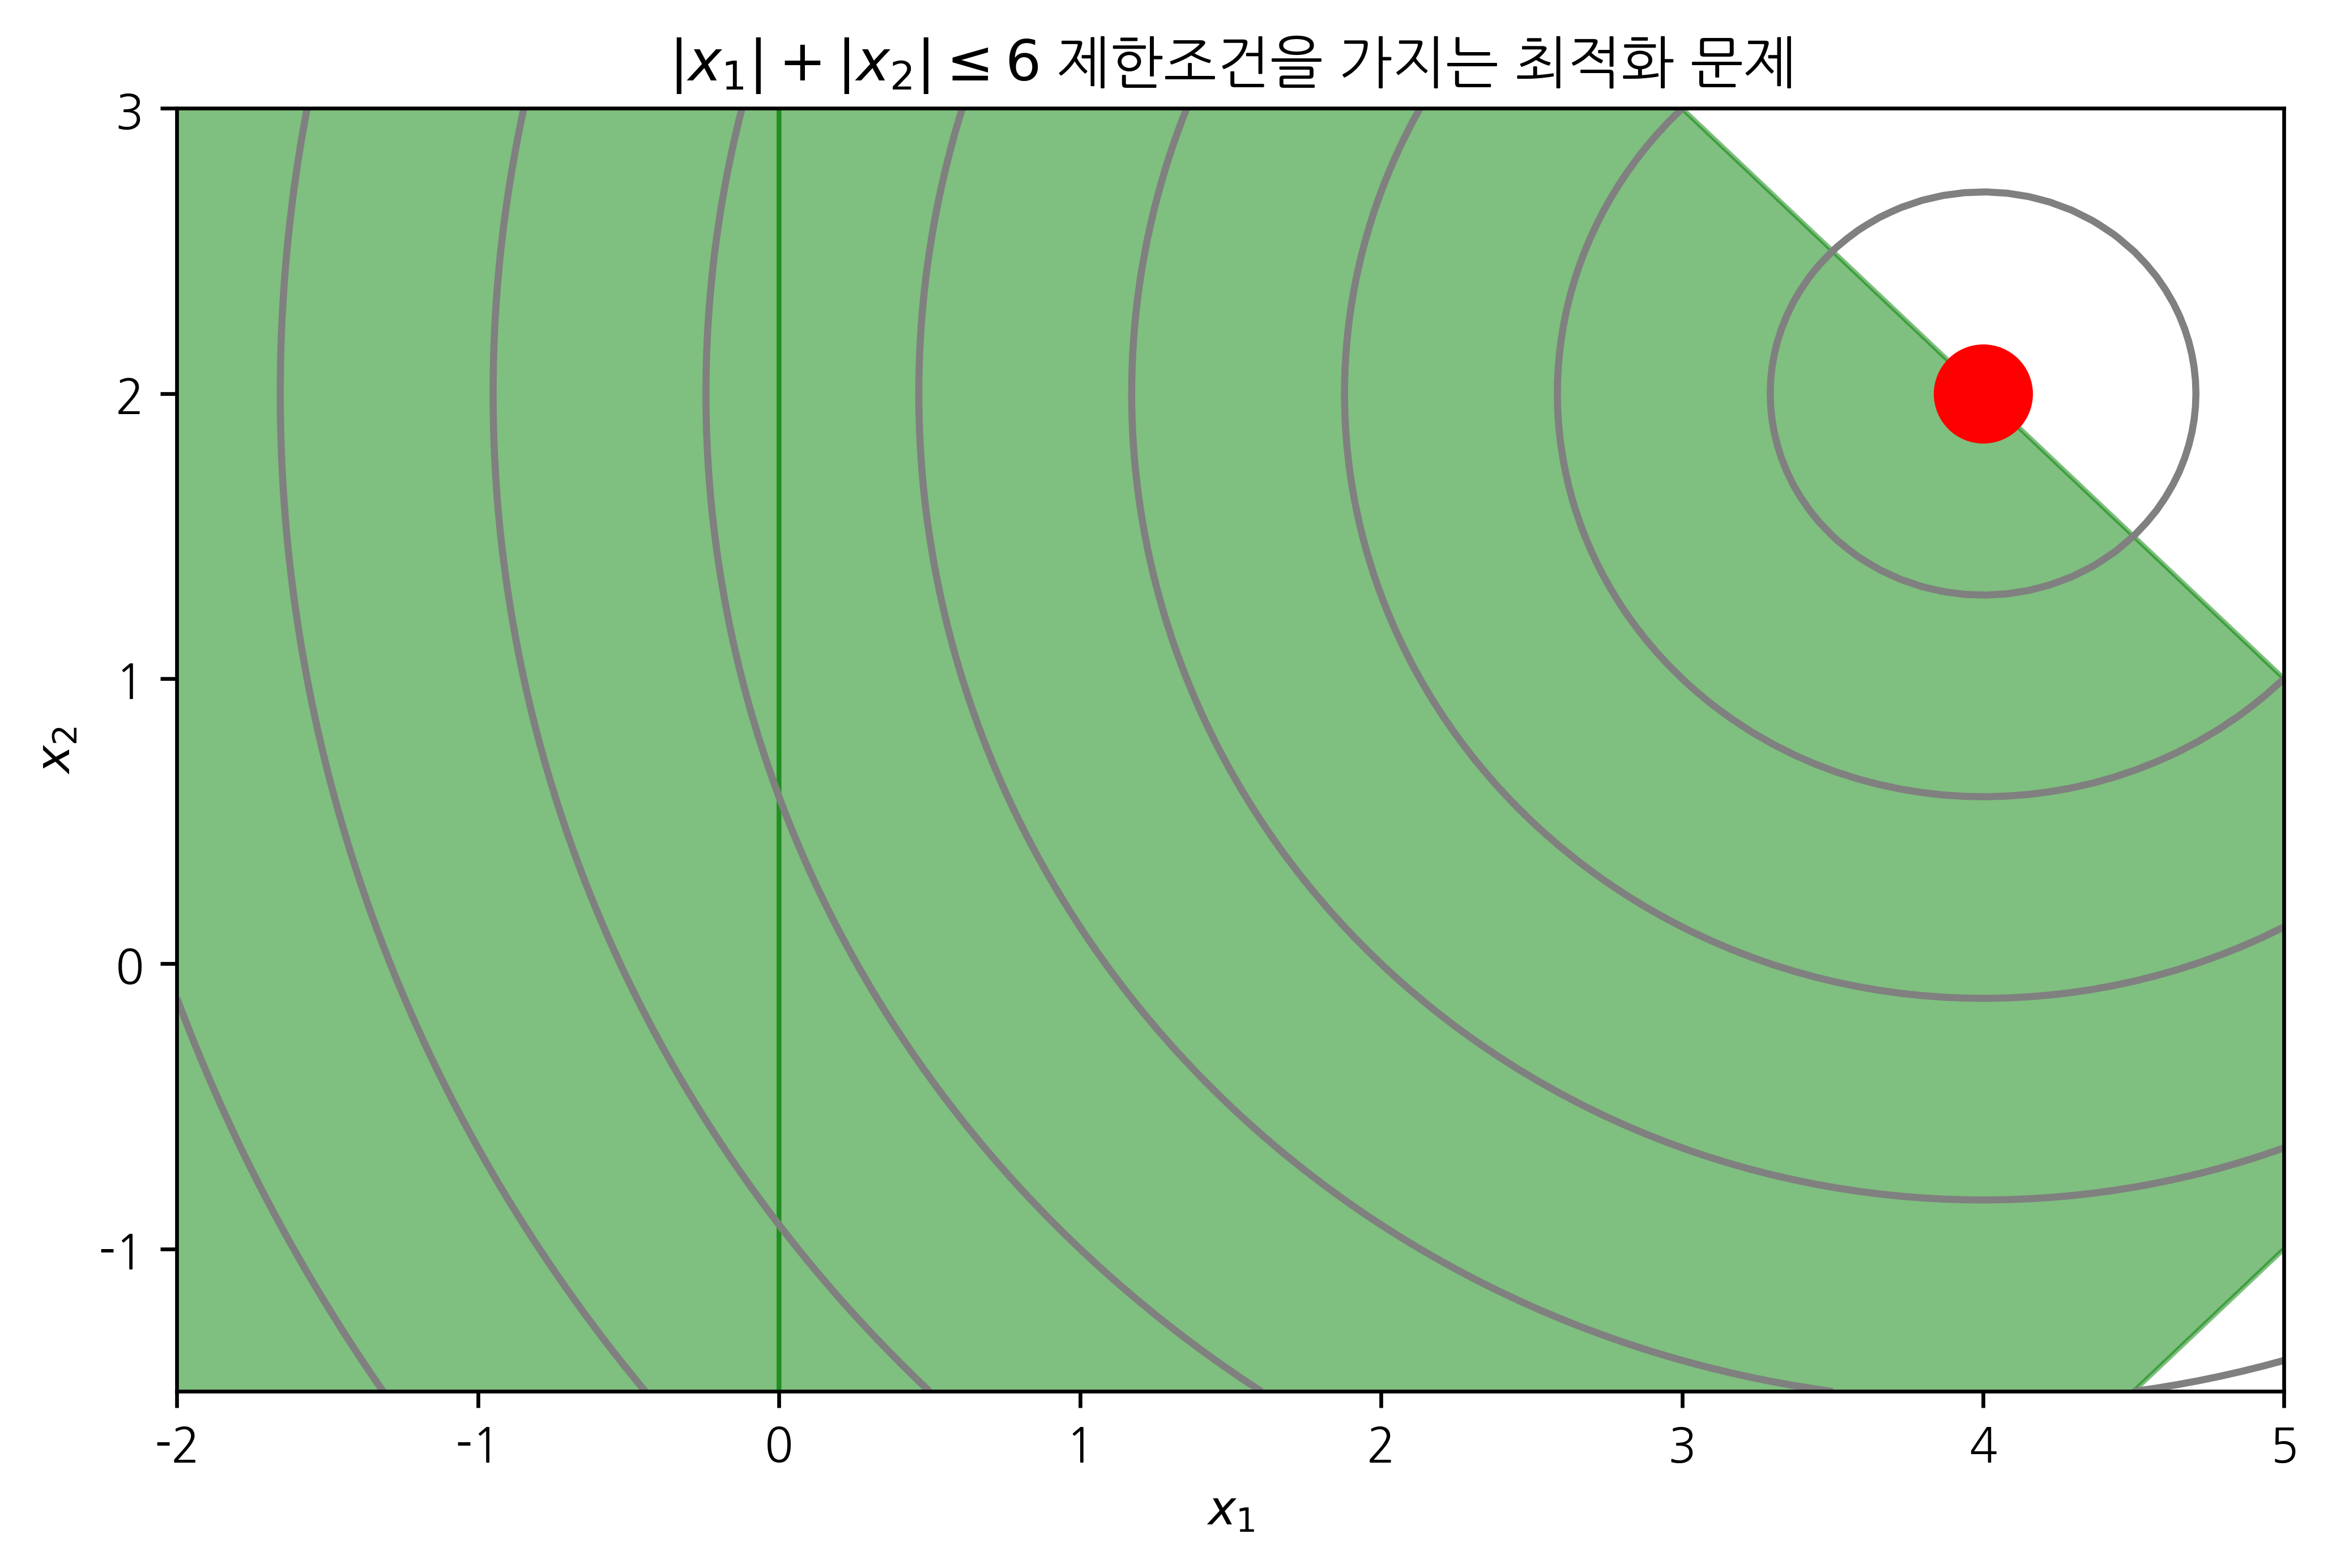

In [18]:
plot_opt(6)

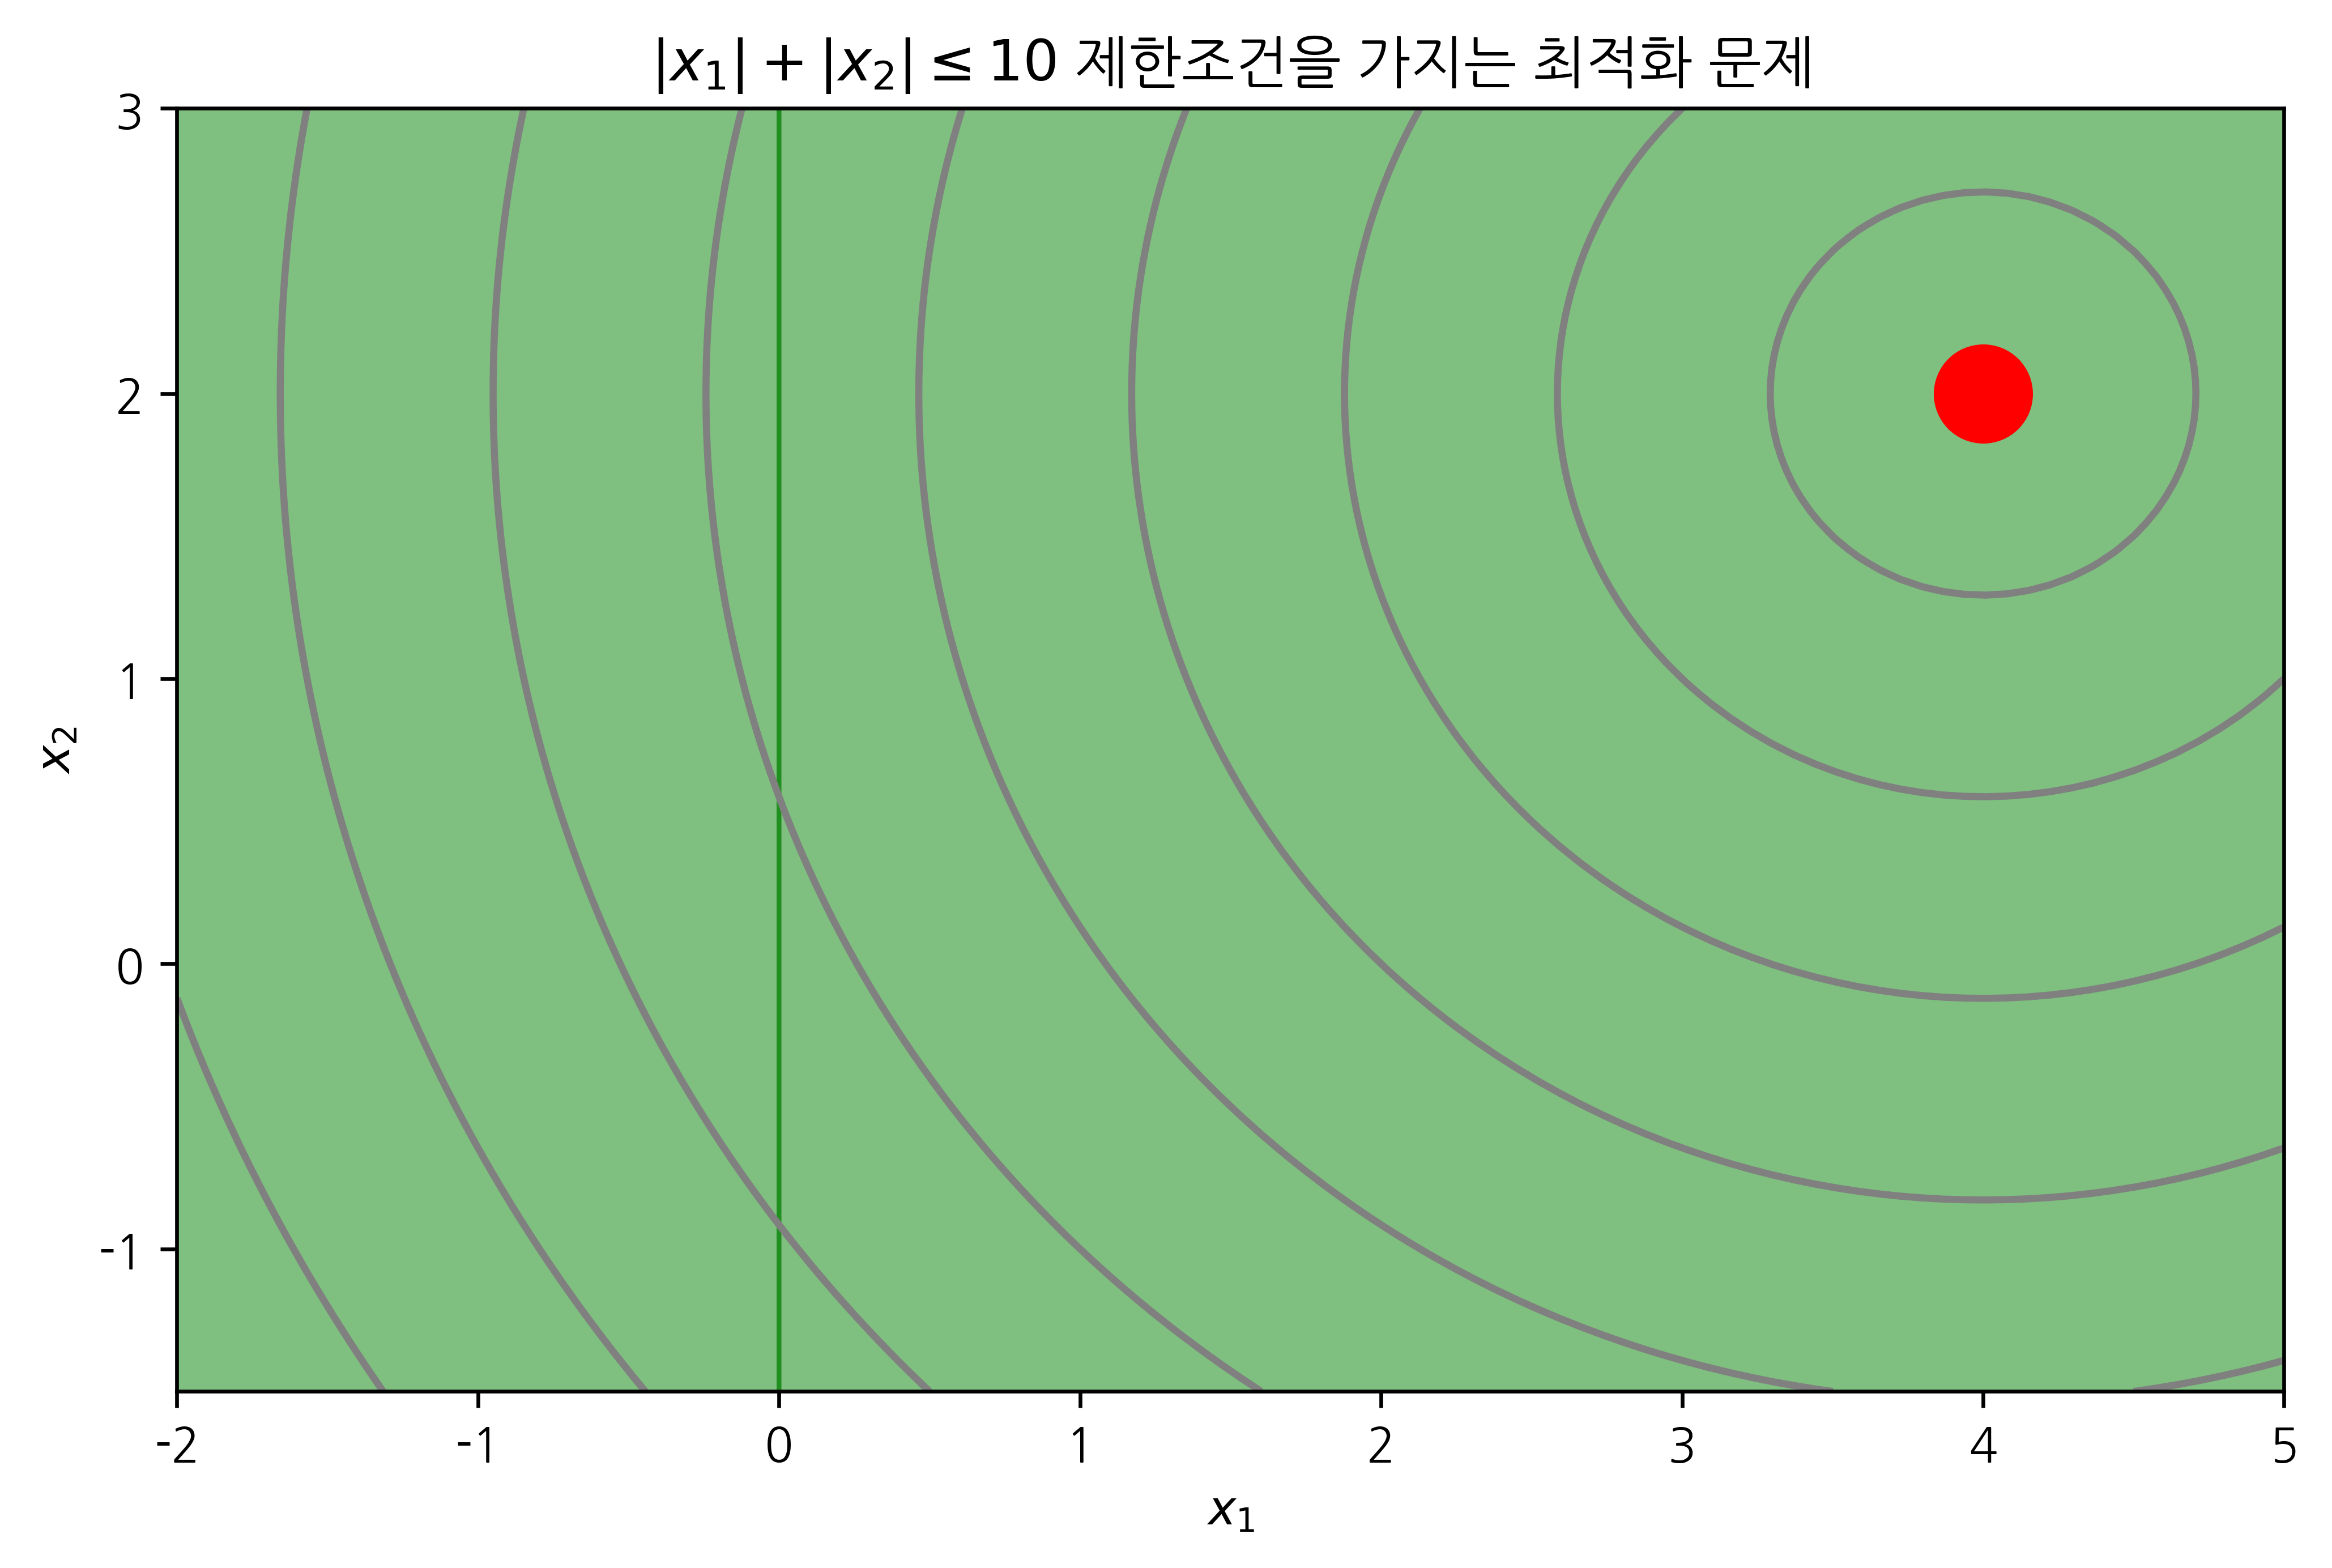

In [19]:
plot_opt(10)

In [20]:
# 연습문제 6.1.1

In [23]:
A1 = frozenset([])
A2 = frozenset(["HH"])
A3 = frozenset(["HT"])
A4 = frozenset(["TH"])
A5 = frozenset(["TT"])
A6 = frozenset(["HH", "HT"])
A7 = frozenset(["HH", "TH"])
A8 = frozenset(["HH", "TT"])
A9 = frozenset(["HT", "TH"])
A10 = frozenset(["HT", "TT"])
A11 = frozenset(["TH", "TT"])
A12 = frozenset(["HH", "HT", "TH"])
A13 = frozenset(["HH", "HT", "TT"])
A14 = frozenset(["HH", "TH", "TT"])
A15 = frozenset(["HT", "TH", "TT"])
A16 = frozenset(["HH", "HT", "TH", "TT"])
set([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13,
    A14, A15, A16])


{frozenset(),
 frozenset({'HT', 'TH'}),
 frozenset({'HH', 'HT'}),
 frozenset({'TT'}),
 frozenset({'TH', 'TT'}),
 frozenset({'HT'}),
 frozenset({'HH'}),
 frozenset({'HT', 'TT'}),
 frozenset({'HH', 'HT', 'TT'}),
 frozenset({'HT', 'TH', 'TT'}),
 frozenset({'HH', 'HT', 'TH'}),
 frozenset({'HH', 'TT'}),
 frozenset({'TH'}),
 frozenset({'HH', 'TH'}),
 frozenset({'HH', 'TH', 'TT'}),
 frozenset({'HH', 'HT', 'TH', 'TT'})}

In [24]:
# 연습문제 6.1.2

In [26]:
A = set([1, 3, 5])
B = set([1, 2, 3])
C = set([2, 4, 6])

A, B, C


({1, 3, 5}, {1, 2, 3}, {2, 4, 6})

In [27]:
A | (B & C) == (A | B) & (A | C)

True

In [28]:
A & (B | C) == (A & B) | (A & C)

True

In [ ]:
# 연습문제 6.2.5 (2)

In [ ]:
{frozenset([]): 0,
frozenset(["HH"]): 0.25,
frozenset(["HT"]): 0.25,
frozenset(["TH"]): 0.25,
frozenset(["TT"]): 0.25,
frozenset(["HH", "HT"]): 0.5,
frozenset(["HH", "TH"]): 0.5,
frozenset(["HH", "TT"]): 0.5,
frozenset(["HT", "TH"]): 0.5,
frozenset(["HT", "TT"]): 0.5,
frozenset(["TH", "TT"]): 0.5,
frozenset(["HH", "HT", "TH"]): 0.75,
frozenset(["HH", "HT", "TT"]): 0.75,
frozenset(["HH", "TH", "TT"]): 0.75,
frozenset(["HT", "TH", "TT"]): 0.75,
frozenset(["HH", "HT", "TH", "TT"]): 1}

In [ ]:
# 연습문제 6.4.3

In [31]:
def P(a, b):
    if a > b:
        raise ValueError("a must be less than b or equal to b")
    a = np.maximum(a, 0)
    b = np.minimum(b, 360)
    if b < 180:
        return (2 / 3) * ((b - a) / 180)
    else:
        if a < 180:
            return (2 / 3) * ((180 - a) / 180) + (1 / 3) * ((b - 180) / 180)
        return (1 / 3) * (((b - a) / 180))
P(0, 270)

0.8333333333333333

In [2]:
def F(a):
    if a < 0:
        return 0
    if a > 360:
        return 1
    elif a < 180:
        return (2 / 3) * (a / 180)
    elif a >= 180:
        return (2 / 3) + (1 / 3) * ((a - 180) / 180)

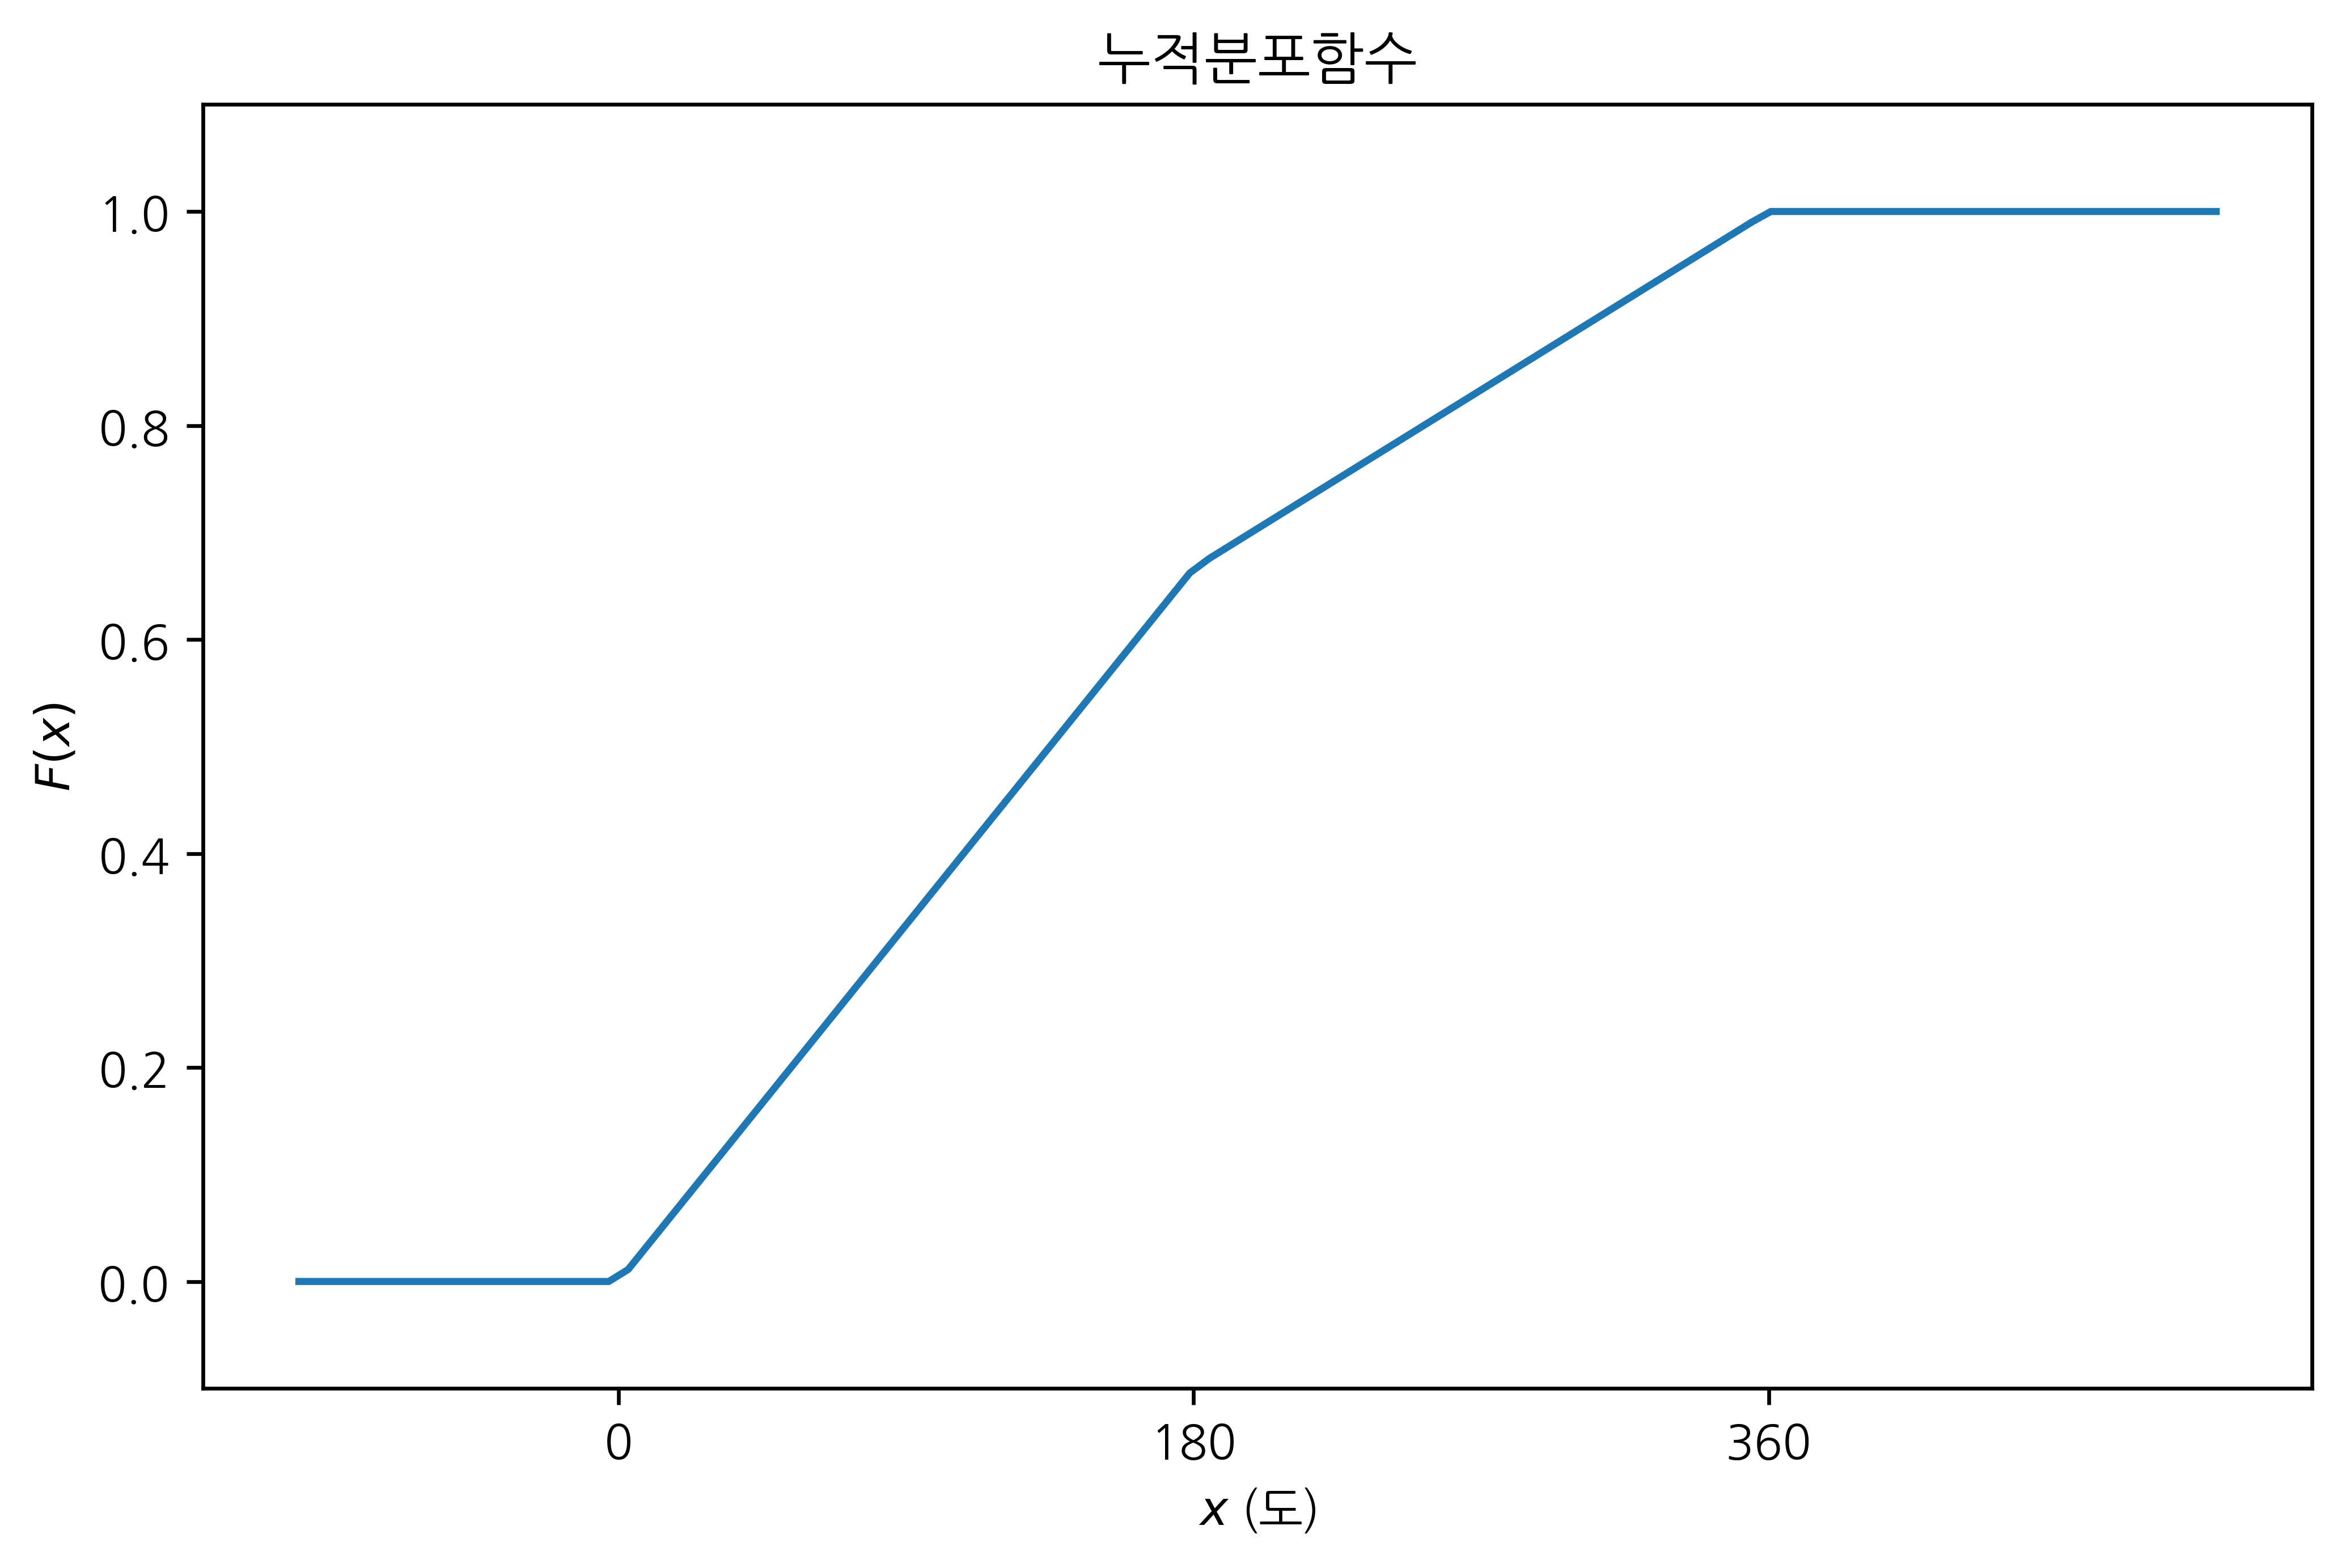

In [3]:
t = np.linspace(-100, 500, 100)
Fs = np.array(list(map(F, t)))
plt.plot(t, Fs)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()